In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import datetime
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path,headless= False)

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [3]:
html = browser.html
html_soup = soup(html,'html.parser')

In [4]:
table = html_soup.find('table',class_='table')

In [5]:
list_ = []

rows = table.find_all('tr')
for row in rows:
    for d in row:
        list_.append(d.text.strip())
        
while ("" in list_):
    list_.remove("")

list_of_lists = [list_[x:x+7]for x in range(0,len(list_),7)]

In [6]:
mars_weather=pd.DataFrame(data=list_of_lists,columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure'])

In [7]:
mars_weather = mars_weather.drop(labels=0,axis=0)
mars_weather.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
6,57,2012-08-21,15,158,6,-78.0,740.0
7,68,2012-08-22,16,158,6,-77.0,740.0
8,79,2012-08-23,17,159,6,-76.0,742.0
9,112,2012-08-27,21,161,6,-74.0,741.0
10,114,2012-08-28,22,162,6,-74.0,742.0


In [8]:
mars_weather['id']=mars_weather['id'].astype(int)
mars_weather['terrestrial_date']=pd.to_datetime(mars_weather['terrestrial_date'])
mars_weather['sol']=mars_weather['sol'].astype(int)
mars_weather['ls']=mars_weather['ls'].astype(int)
mars_weather['month']=mars_weather['month'].astype(int)
mars_weather['min_temp']=mars_weather['min_temp'].astype(float)
mars_weather['pressure']=mars_weather['pressure'].astype(float)


In [9]:
mars_weather.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
mars_weather.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
answer1 = 0
for month in mars_weather['month']:
    if answer1 < month:
        answer1 = month
    else:
        continue
print(f'there are {answer1} months on mars')
        
        

there are 12 months on mars


In [12]:
answer2 = mars_weather['sol'].count()
print(f'there are {answer2} martian days worth of data')

there are 1867 martian days worth of data


In [13]:
import matplotlib.pyplot as plt
import numpy as np

average_temp_df = mars_weather.groupby(["month"]).mean()['min_temp']

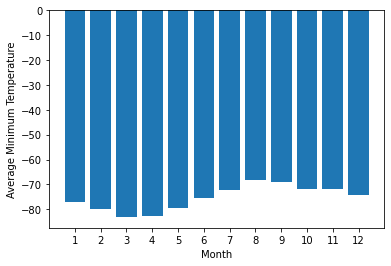

In [14]:
x_axis = []
for x in range(1,13):
    x_axis.append(x)
plt.bar(x_axis,average_temp_df)
plt.xticks(np.arange(1,13,step = 1))
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.show()


In [15]:
average_press_df = mars_weather.groupby(["month"]).mean()['pressure']

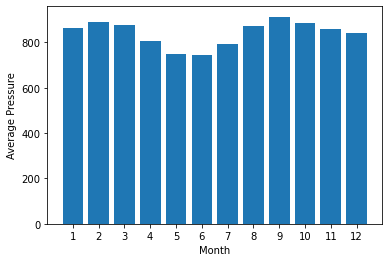

In [16]:
x_axis = []
for x in range(1,13):
    x_axis.append(x)
plt.bar(x_axis,average_press_df)
plt.xticks(np.arange(1,13,step = 1))
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

In [19]:
mars_weather.to_csv('mars_weather')